In [25]:
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from pdb import set_trace
from datetime import datetime
from collections import defaultdict
from pathlib import Path
from sklearn import preprocessing

# Current Working directory
cur_dir = Path.cwd()
data_dir = cur_dir.joinpath('trends')

daily_data = pd.DataFrame()

def is_weekend(date):
    return datetime.strptime(date, "%Y-%m-%d").weekday() >=5
        
for daily_stats_file in data_dir.glob("*.csv"):
    date = daily_stats_file.stem
    if is_weekend(date):
        continue
    stats = pd.read_csv(daily_stats_file, index_col=0)
    daily_data = daily_data.append({
        'Date': date,
        'Mean IssuesOpened': stats.IssueCreated["mean"],#+stats.IssueClosed["mean"],
#         'Mean IssuesOpened': stats.IssueCreated["mean"]-stats.IssueClosed["mean"],
        'Std IssuesOpened': stats.IssueCreated["std"],
        'Mean IssuesClosed': stats.IssueClosed["mean"],
        'Std IssuesClosed': stats.IssueClosed["std"]
    }, ignore_index=True)
#     daily_data = daily_data.append({
#         'Date': date,
#         'Median IssuesOpened': stats.IssueCreated["50%"],
#         '25th IssuesOpened': stats.IssueCreated["25%"],
#         '75th IssuesOpened': stats.IssueCreated["75%"],
#         'Median IssuesClosed': stats.IssueClosed["50%"],
#         '25th IssuesClosed': stats.IssueClosed["25%"],
#         '75th IssuesClosed': stats.IssueClosed["25%"]
#     })


daily_data['Date'] = pd.to_datetime(daily_data['Date'], format="%Y-%m-%d")
daily_data.sort_values(by='Date', inplace=True)
start_date = datetime.strptime("2019-09-01", "%Y-%m-%d")
end_date = datetime.strptime("2019-12-31", "%Y-%m-%d")

start_date_2 = datetime.strptime("2020-01-01", "%Y-%m-%d")
end_date_2 = datetime.strptime("2020-04-30", "%Y-%m-%d")

# daily_data = daily_data.loc[(start_date <= daily_data["Date"]) & (daily_data["Date"] <= end_date)]# | (start_date_2 <= daily_data["Date"]) & (daily_data["Date"] <= end_date_2)]
daily_data_2020 = daily_data.loc[(start_date_2 <= daily_data["Date"]) & (daily_data["Date"] <= end_date_2)]# | (start_date_2 <= daily_data["Date"]) & (daily_data["Date"] <= end_date_2)]
daily_data_2019 = daily_data.loc[(start_date <= daily_data["Date"]) & (daily_data["Date"] <= end_date)]# | (start_date_2 <= daily_data["Date"]) & (daily_data["Date"] <= end_date_2)]

# daily_data['Date'] = daily_data['Date'].astype('str')
# daily_data["Year"] = daily_data["Date"].apply(lambda x: x.split("-")[0]).astype(str)
# # daily_data["Date"] = pd.to_datetime(daily_data["Date"], format="%Y-%m-%d")
# daily_data['Date'] = daily_data['Date'].apply(lambda x: "-".join(x.split("-")[1:]))

# daily_data = daily_data.sort_values(by=["Year", "Date"])


In [ ]:
daily_data = daily_data.reset_index()
daily_data = daily_data.drop('index', axis=1)
ax = sns.lineplot(x="Date", y="Mean IssuesOpened", hue="Year", data=daily_data)

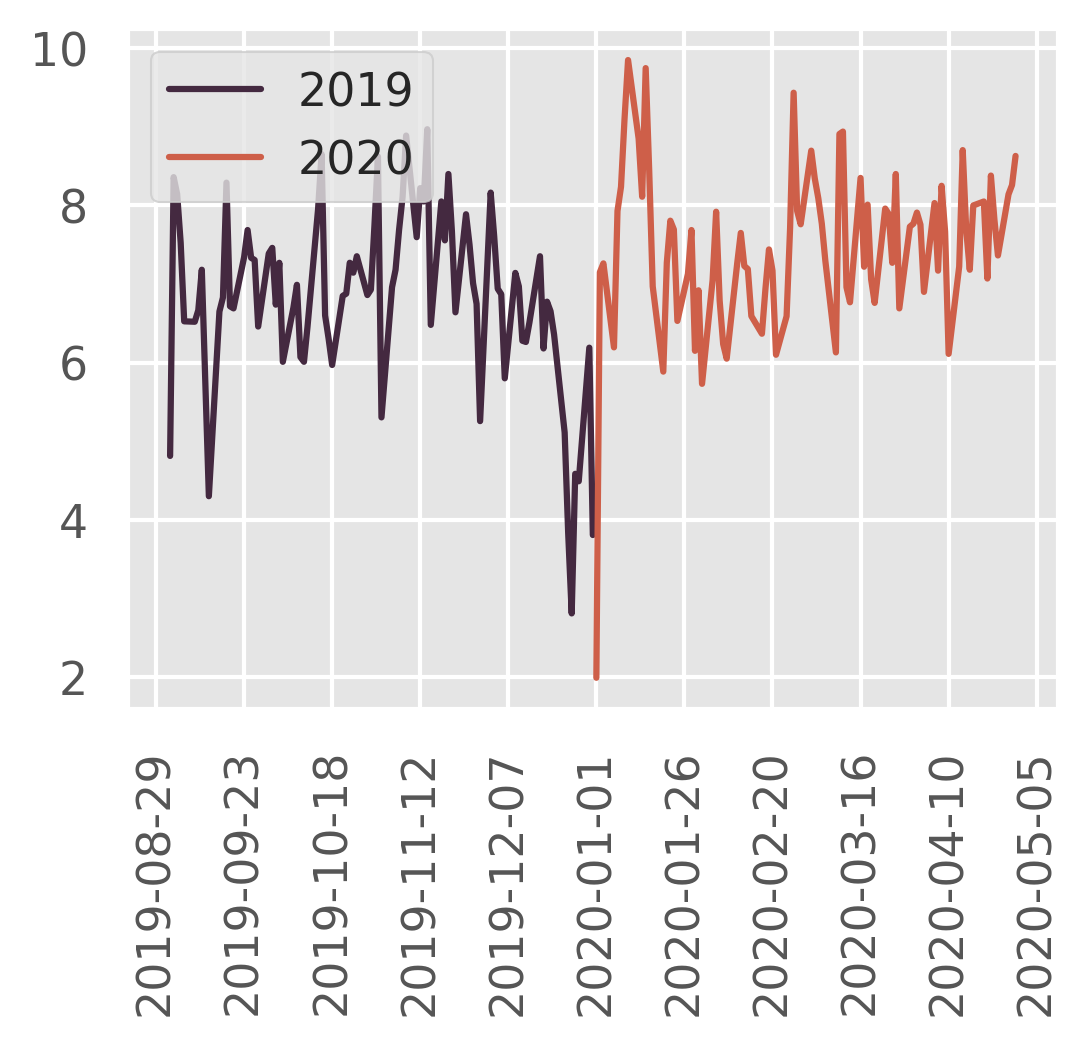

In [27]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
w = 4
h = 3
d = 300
fig, ax = plt.subplots(1, 1, figsize=(w, h), dpi=d)

x_2020 = daily_data_2020["Date"]#.apply(lambda x: x.strftime("%m-%d"))
x_2019 = daily_data_2019["Date"]#.apply(lambda x: x.strftime("%m-%d"))

mean_issues_opened_2020 = daily_data_2020["Mean IssuesClosed"]
mean_issues_opened_2019 = daily_data_2019["Mean IssuesClosed"]


# issues_opened_upper = mean_issues_opened + 0.98 * daily_data["Std IssuesOpened"]
# issues_opened_lower = mean_issues_opened - 0.98 * daily_data["Std IssuesOpened"]

# mean_issues_closed = daily_data["Mean IssuesClosed"]
# issues_closed_upper = mean_issues_closed + 0.98 * daily_data["Std IssuesOpened"]
# issues_closed_lower = mean_issues_closed - 0.98 * daily_data["Std IssuesOpened"]

plt.plot(x_2019, mean_issues_opened_2019, color='#442940', label="2019")
plt.plot(x_2020, mean_issues_opened_2020, color='#CE5F49', label="2020")

# plt.fill_between(x, issues_closed_lower, issues_closed_upper, color='#CE5F49', alpha=0.2)

# plt.plot(x, home, color='#1C0B0E')
# plt.fill_between(x, home_std_lower, home_std_upper, color='#1C0B0E', alpha=0.2)

# plt.plot(x, new_repos, color='#442940', label='All Repositories')
# plt.plot(x, new_covid_related_repos, color='#132A49', label="COVID Related Repos")

ax.xaxis.set_major_locator(plt.MaxNLocator(12))
ax.xaxis.set_tick_params(rotation=90)
ax.legend(loc='upper left')
plt.show()
